In [12]:
import pandas as pd

In [13]:
dataset=pd.read_csv("Pre-Placement.csv")
dataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.0,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.0,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,0.0,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211.0,80.60,82.00,77.60,91.0,74.49,400000.0,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,212.0,58.00,60.00,72.00,74.0,53.62,275000.0,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,213.0,67.00,67.00,73.00,59.0,69.72,295000.0,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,214.0,74.00,66.00,58.00,70.0,60.23,204000.0,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [14]:
dataset.isnull().sum()

sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [4]:
#used for visualisation purpose
import seaborn as sns

C:\Users\spavi\Anaconda3\Anaconda\envs\aiml\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


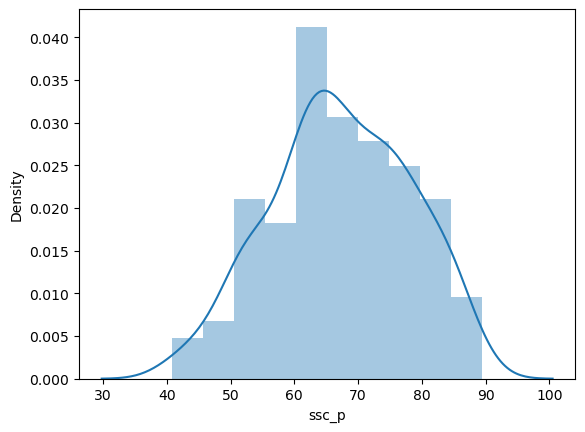

In [5]:
#distplot is distribution plot
sns.distplot(dataset["ssc_p"])

In [6]:
#what is the probability of getting mark 60 to 70
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    # inbuilt function for normal distribution so we import this library
    from scipy.stats import norm
    import seaborn as sns
    #In distplot kde(Kernel density function)=True the curve will display
    ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color="Green")
    #axvline is vertical line startrange and the color is red
    pyplot.axvline(startrange,color='Red')
    #axvline is vertical line startrange and the color is red
    pyplot.axvline(endrange,color="Red")
    #Until this line the graph is created
    #Below lines for calculation
    #generate a sample
    sample=dataset
    #calculate parameters
    sample_mean=sample.mean()
    sample_std=sample.std()
    print('Mean=%.3f , Standard Deviation=%.3f' % (sample_mean, sample_std))
    #define the distribution
    #inbuilt normal distribution function
    dist=norm(sample_mean,sample_std)
    
    #sample probabilities for a range of outcomes
    #advantage of below line is in single line the output is converted into list it is called oneliner for loop
    values=[value for value in range(startrange,endrange)]
    probabilities=[dist.pdf(value)for value in values]
    prob=sum(probabilities)
    print("The area between range ({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

Mean=67.303 , Standard Deviation=10.827
The area between range (40,60):0.23035961179550077


C:\Users\spavi\Anaconda3\Anaconda\envs\aiml\lib\site-packages\ipykernel_launcher.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


0.23035961179550077

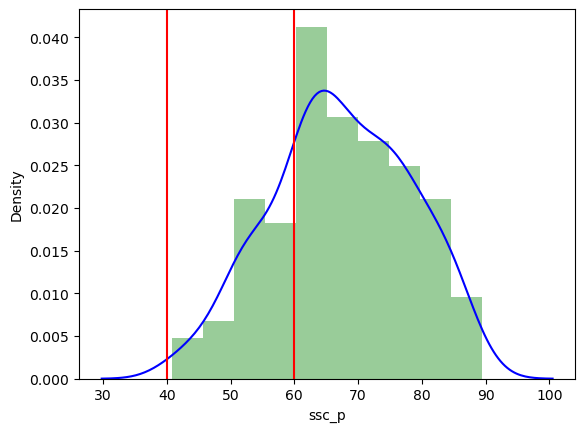

In [7]:
get_pdf_probability(dataset["ssc_p"],40,60)

In [8]:
!pip install statsmodels

In [9]:
#cumulative density function
#ecdf is empherical cumulative density function
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset["ssc_p"])
#78 is in which percentage we get output 
ecdf(78)

0.827906976744186

In [19]:
#Standard Normalisation
def stdNBgraph(dataset):
    import seaborn as sns
    #mean and std calculation
    mean=dataset.mean()
    std=dataset.std()
    #Oneliner advantage of oneliner is in single line the output is converted into list 
    values=[i for i in dataset]
    #formula calculation
    z_score=[((j-mean)/std) for j in values]
    #kde(Kernel density function )=True the curve is dislayed
    sns.distplot(z_score,kde=True)
    sum(z_score)/len(z_score)

C:\Users\spavi\Anaconda3\Anaconda\envs\aiml\lib\site-packages\ipykernel_launcher.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if sys.path[0] == "":


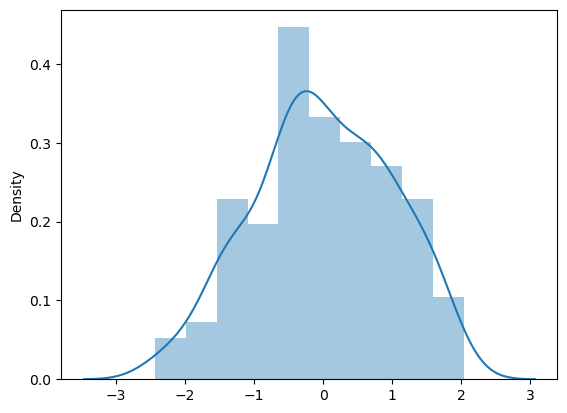

In [20]:
stdNBgraph(dataset["ssc_p"])